# How To Find Threshold For Binary Classification

In [ ]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For roc and auc score
from sklearn.datasets import make_classification


In [ ]:
from sklearn.model_selection import train_test_split

X,y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=42)
# Balanced dataset

In [ ]:
print("No. of Rows: {}".format(X.shape[0]))
print("No. of Columns: {}".format(X.shape[1]))


No. of Rows: 2000
No. of Columns: 20


In [ ]:
y

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
#Dividing the data into training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Predicting Probability
ytrain_pred = rfc.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))

ytest_pred = rfc.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))


RF train roc-auc: 1.0
RF test roc-auc: 0.9881948482014207


## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predicting Probability
y_train_pred = lr.predict_proba(X_train)
print('LR train roc-auc: {}'.format(roc_auc_score(y_train, y_train_pred[:,1])))

y_test_pred = lr.predict_proba(X_test)
print('LR test roc-auc: {}'.format(roc_auc_score(y_test, y_test_pred[:,1])))

LR train roc-auc: 0.9725573715122062
LR test roc-auc: 0.9805859602113299


## **AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()

adb.fit(X_train, y_train)

# Predicting Probability
y_train_pred = adb.predict_proba(X_train)
print('ADB train roc-auc: {}'.format(roc_auc_score(y_train, y_train_pred[:,1])))

y_test_pred = adb.predict_proba(X_test)
print('ADB test roc-auc: {}'.format(roc_auc_score(y_test, y_test_pred[:,1])))

ADB train roc-auc: 0.9969351822315627
ADB test roc-auc: 0.9872848150863268


## **KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

# Predicting Probability

y_train_pred = knn.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, y_train_pred[:,1])))

y_test_pred = knn.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))


KNN train roc-auc: 0.9878329861958106
KNN test roc-auc: 0.9614879041431786


## **Now we will focus on selecting the best threshold for maximum accuracy**

In [ ]:
predictions = []

for model in [rfc,lr,adb,knn]:
  predictions.append(pd.Series(model.predict_proba(X_test)[:,1]))

final_prediction = pd.concat(predictions, axis=1).mean(axis=1)
print("Ensemble test roc-auc: {}".format(roc_auc_score(y_test, final_prediction)))


Ensemble test roc-auc: 0.9899896357339669


In [ ]:
pd.concat(predictions, axis=1)

,0,1,2,3
0,0.01,0.002560,0.376323,0.0
1,0.93,0.817947,0.506314,0.8
2,0.01,0.001052,0.458105,0.0
3,0.98,0.776468,0.526898,1.0
4,0.00,0.000035,0.372331,0.0
...,...,...,...,...
395,0.96,0.994786,0.527761,1.0
396,0.97,0.993724,0.526765,1.0
397,0.01,0.000144,0.368812,0.0
398,0.11,0.340947,0.479632,0.6


In [ ]:
final_prediction

0      0.097221
1      0.763565
2      0.117289
3      0.820842
4      0.093091
         ...   
395    0.870637
396    0.872622
397    0.094739
398    0.382645
399    0.813006
Length: 400, dtype: float64

In [ ]:
## Calculate the ROC Curve

fpr, tpr, threshold = roc_curve(y_test, final_prediction)
threshold

array([1.92058262, 0.92058262, 0.8467451 , 0.846682  , 0.80781191,
       0.80756811, 0.80195042, 0.80187241, 0.73731028, 0.73254136,
       0.70040016, 0.69832108, 0.6805941 , 0.66868377, 0.6440471 ,
       0.64153367, 0.58456705, 0.5625884 , 0.51224948, 0.47733839,
       0.46260206, 0.38264463, 0.37580249, 0.23226354, 0.22118928,
       0.20465871, 0.20450009, 0.06489635])

In [ ]:
## Selecting Accuracy Score for each threshold value

from sklearn.metrics import accuracy_score
accuracy_list = []

for thres in threshold:
  y_pred = np.where(final_prediction > thres,1,0)
  accuracy_list.append(accuracy_score(y_test,y_pred, normalize=True))

accuracy_list = pd.concat([pd.Series(threshold), pd.Series(accuracy_list)], axis=1)

accuracy_list.columns = ['threshold','accuracy']
accuracy_list.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_list.head()

,threshold,accuracy
19,0.477338,0.9625
20,0.462602,0.9600
18,0.512249,0.9600
16,0.584567,0.9600
17,0.562588,0.9575


In [ ]:
def plot_roc_auc(fpr,tpr):
  plt.plot(fpr,tpr, color='darkblue', label='ROC')
  plt.plot([0,1], [0,1], color='orange', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristics (ROC) Curve')
  plt.legend()
  plt.show()

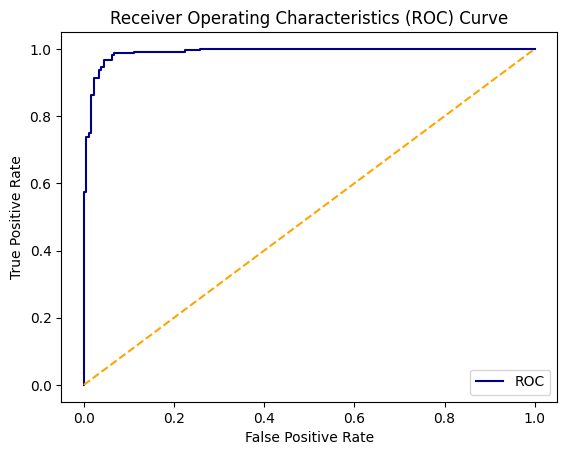

In [ ]:
plot_roc_auc(fpr,tpr)